# Line Search 
This notebook aims to help gain an understanding of the line search algorithm by defining a line search algorithm to compute the input value that gives the minimum loss for a 1D loss function

### Imports 
Import the libraries necessary to define the line search algorithm, plotting function, and the line search algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define a 1D Loss Function 
Define a 1D loss function with one input parameter (phi)

In [2]:
def loss_function(phi):
  return 1- 0.5 * np.exp(-(phi-0.65)*(phi-0.65)/0.1) - 0.45 *np.exp(-(phi-0.35)*(phi-0.35)/0.02)

### Define Plotting Function 
Define a function to plot the 1D loss function

In [3]:
def draw_function(loss_function,a=None, b=None, c=None, d=None):
  phi_plot = np.arange(0,1,0.01);
  fig,ax = plt.subplots()
  ax.plot(phi_plot,loss_function(phi_plot),'r-')
  ax.set_xlim(0,1); ax.set_ylim(0,1)
  ax.set_xlabel(r'phi'); ax.set_ylabel(r'L[phi]')
  if a is not None and b is not None and c is not None and d is not None:
      plt.axvspan(a, d, facecolor='k', alpha=0.2)
      ax.plot([a,a],[0,1],'b-')
      ax.plot([b,b],[0,1],'b-')
      ax.plot([c,c],[0,1],'b-')
      ax.plot([d,d],[0,1],'b-')
  plt.show()

### Plot 1D Loss Function

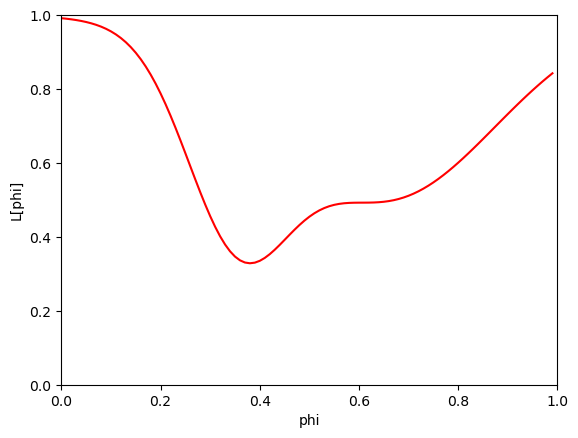

In [4]:
draw_function(loss_function)

### Define a Line Search Algorithm 
Define a line search algorithm, which defines four input values along an interval and continiously itterates 3 rules (defined below) to converge the four input values to the input value that results in the minimum of the 1D loss function

In [5]:
def line_search(loss_function, thresh=.0001, max_iter = 10, draw_flag = False):

    # Initialize four points along the interval being searched
    a = 0
    b = 0.33
    c = 0.66
    d = 1.0
    n_iter = 0

    # Loop the line search till the minimum of the loss function has been accurately estimated
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (to prevent an infinite loop)
        n_iter = n_iter+1

        # Calculate the loss of all four points
        lossa = loss_function(a)
        lossb = loss_function(b)
        lossc = loss_function(c)
        lossd = loss_function(d)

        if draw_flag:
          draw_function(loss_function, a,b,c,d)

        print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))

        # Rule #1 If the HEIGHT at point A is less than the HEIGHT at points B, C, and D
        # Move the pints so that they are half as far from A as they start
        if (lossa < lossb and lossa < lossc and lossa < lossd):
          b = a + (b-a)/2
          c = a + (c-a)/2
          d = d + (d-a)/2
          continue


        # Rule #2 If the HEIGHT at point b is less than the HEIGHT at point c then
        # 1) point d becomes point c, and
        # 2) point b becomes 1/3 between a and new d
        # 3) point c becomes 2/3 between a and new d
        if (lossb < lossc):
          d = c 
          b = a + (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #3 If the HEIGHT at point c is less than the HEIGHT at point b then
        # 1) point a becomes point b, 
        # 2) point b becomes 1/3 between new a and d
        # 3) point c becomes 2/3 between new a and d
        if(lossc < lossb):
          a = b
          b = a + (d-a)/3
          c = a + 2*(d-a)/3

    # Compute the result
    soln = (b+c)/2

    return soln

### Compute the least loss input value 
Use the defined line search algorithm to find the input parameter (phi) that results in the minimum of the 1D loss function. Plot the iterations of the line search algorithm and print the final input parameter afterwards along with its loss.

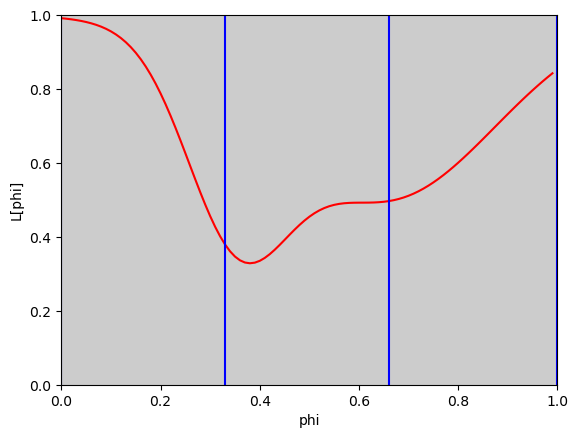

Iter 1, a=0.000, b=0.330, c=0.660, d=1.000


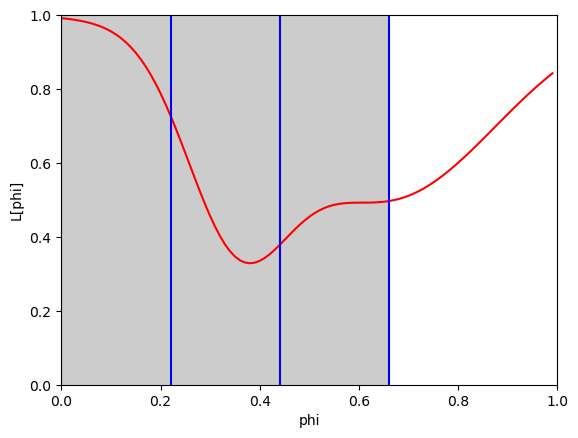

Iter 2, a=0.000, b=0.220, c=0.440, d=0.660


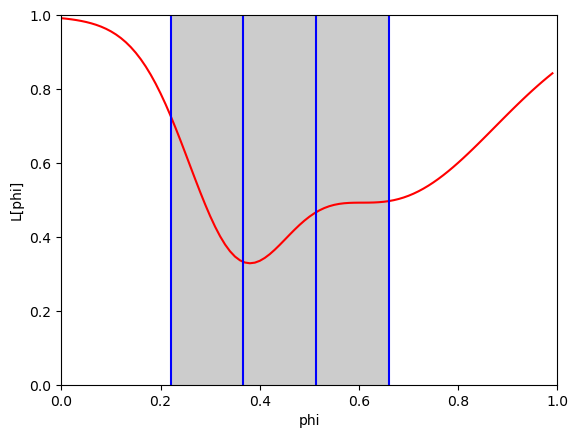

Iter 3, a=0.220, b=0.367, c=0.513, d=0.660


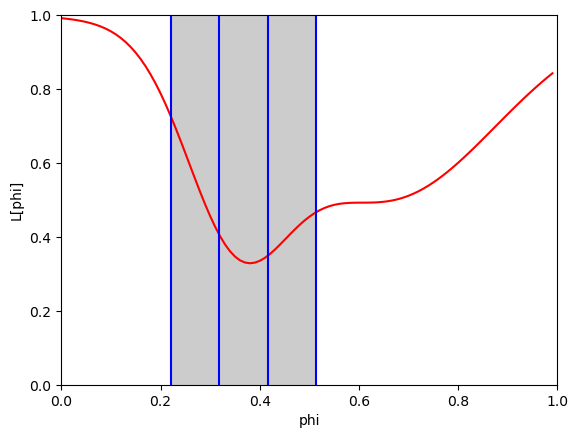

Iter 4, a=0.220, b=0.318, c=0.416, d=0.513


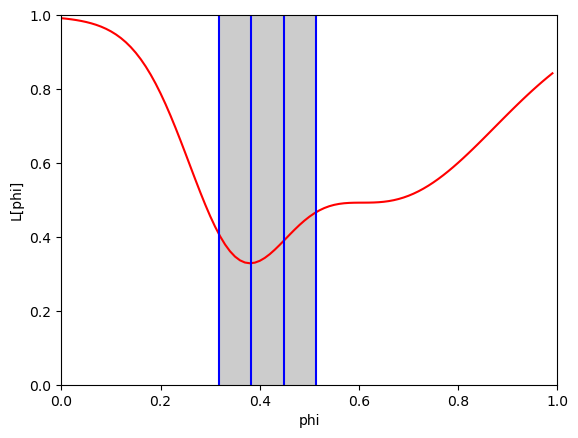

Iter 5, a=0.318, b=0.383, c=0.448, d=0.513


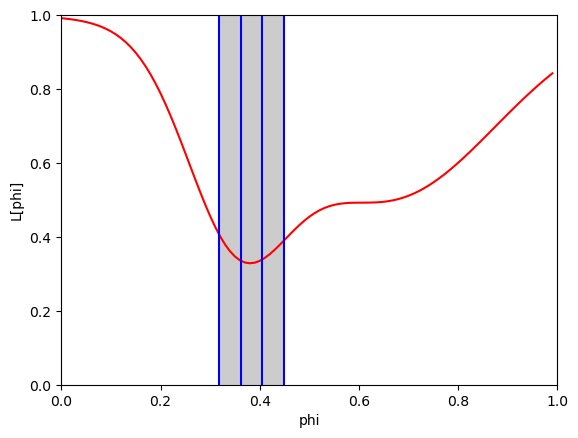

Iter 6, a=0.318, b=0.361, c=0.405, d=0.448


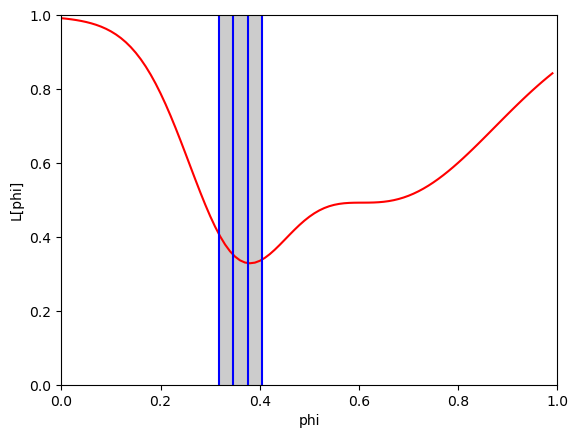

Iter 7, a=0.318, b=0.347, c=0.376, d=0.405


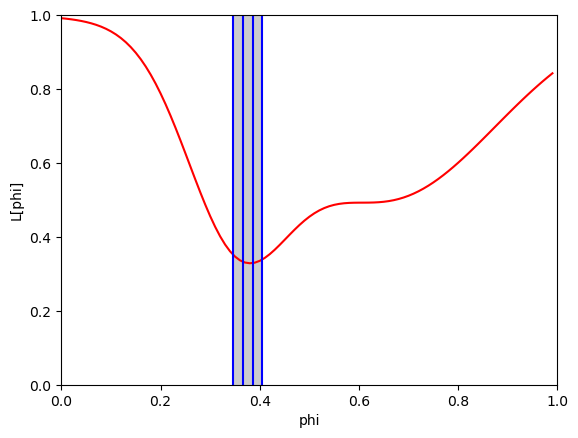

Iter 8, a=0.347, b=0.366, c=0.385, d=0.405


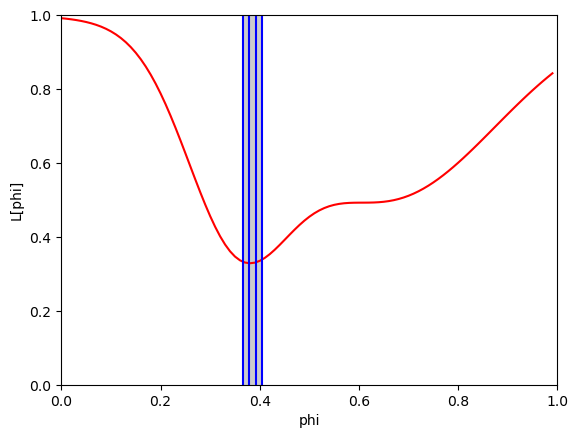

Iter 9, a=0.366, b=0.379, c=0.392, d=0.405


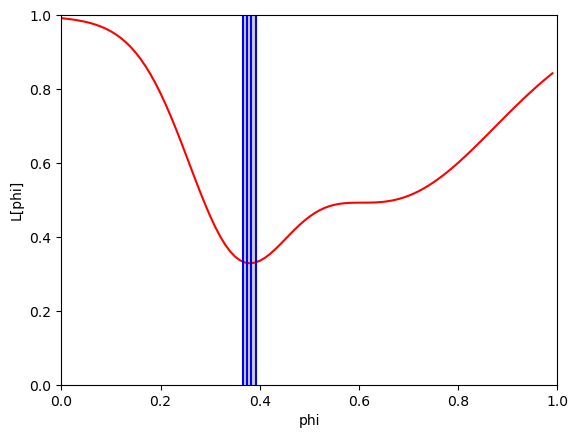

Iter 10, a=0.366, b=0.375, c=0.383, d=0.392
Soln = 0.383, loss = 0.329


In [8]:
soln = line_search(loss_function, draw_flag=True)
print('Soln = %3.3f, loss = %3.3f'%(soln,loss_function(soln)))